# NTDS'18 milestone 1: network collection and properties
[Effrosyni Simou](https://lts4.epfl.ch/simou), [EPFL LTS4](https://lts4.epfl.ch)

## Students

* Team: `<your team number>`
* Students: `<the name of all students in the team>`
* Dataset: `<the dataset you used to complete the milestone>`

## Rules

* Milestones have to be completed by teams. No collaboration between teams is allowed.
* Textual answers shall be short. Typically one to three sentences.
* Code has to be clean.
* You cannot import any other library than we imported.
* When submitting, the notebook is executed and the results are stored. I.e., if you open the notebook again it should show numerical results and plots. We won't be able to execute your notebooks.
* The notebook is re-executed from a blank state before submission. That is to be sure it is reproducible. You can click "Kernel" then "Restart & Run All" in Jupyter.

## Objective 

The purpose of this milestone is to start getting acquainted to the network that you will use for this class. In the first part of the milestone you will import your data using [Pandas](http://pandas.pydata.org) and you will create the adjacency matrix using [Numpy](http://www.numpy.org). This part is project specific. In the second part you will have to compute some basic properties of your network. **For the computation of the properties you are only allowed to use the packages that have been imported in the cell below.** You are not allowed to use any graph-specific toolboxes for this milestone (such as networkx and PyGSP). Furthermore, the aim is not to blindly compute the network properties, but to also start to think about what kind of network you will be working with this semester. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json

## Part 1 - Import your data and manipulate them. 

###  A. Load your data in a Panda dataframe.

First, you should define and understand what are your nodes, what features you have and what are your labels. Please provide below a Panda dataframe where each row corresponds to a node with its features and labels. For example, in the the case of the Free Music Archive (FMA) Project, each row of the dataframe would be of the following form:


| Track   |  Feature 1  | Feature 2 | . . . | Feature 518|  Label 1 |  Label 2 |. . .|Label 16|
|:-------:|:-----------:|:---------:|:-----:|:----------:|:--------:|:--------:|:---:|:------:|
|         |             |           |       |            |          |          |     |        |

It is possible that in some of the projects either the features or the labels are not available. This is OK, in that case just make sure that you create a dataframe where each of the rows corresponds to a node and its associated features or labels.

In [2]:
DATA_PATH = "DataMS1/"

In [3]:
FILE_PATH_MOVIES = "DataMS1/tmdb_5000_movies.csv"
FILE_PATH_CREW = "DataMS1/tmdb_5000_credits.csv"

In [4]:
# Load each file in a dataframe
features_movies = pd.read_csv(FILE_PATH_MOVIES)
features_crew = pd.read_csv(FILE_PATH_CREW)
features_movies.set_index('id', inplace=True)
features_crew.set_index('movie_id', inplace=True)

In [6]:
features_movies.head()

,budget,genres,homepage,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
id,,,,,,,,,,,,,,,,,,,
19995,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
285,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
206647,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
49026,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
49529,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [7]:
features_crew.head()

,title,cast,crew
movie_id,,,
19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [5]:
# Create a dataframe with the desired features and labels:
# Nodes = movies
# Features = Cast, Crew, Ratings
# Labels = Genres
features = pd.concat([features_movies[['vote_average', 'genres']], features_crew[['cast', 'crew', 'title']]], axis=1)
features.reset_index(inplace=True)
features.rename(index=str, columns={"index": "movie_id"}, inplace=True)
features.head()

,movie_id,vote_average,genres,cast,crew,title
0,19995,7.2,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",Avatar
1,285,6.9,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",Pirates of the Caribbean: At World's End
2,206647,6.3,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",Spectre
3,49026,7.6,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",The Dark Knight Rises
4,49529,6.1,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",John Carter


In [95]:
# Convert the json string into a set of the ids of the cast and crew
# Useful for next computations

features.cast = features.cast.apply(lambda x: set(pd.read_json(x, dtype=False).id) if x != '[]' else set())
# All the crew is taken
# Maybe we should only take: "Producer", "Music", "Screenplay", "Director", "Director of Photography", "Editor", "Art Direction"
features.crew = features.crew.apply(lambda x: set(pd.read_json(x, dtype=False).id) if x != '[]' else set())

In [96]:
features.head()

,movie_id,vote_average,genres,cast,crew,title
0,19995,7.2,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","{397312, 1180936, 1145098, 1186027, 103259, 30...","{72201, 14350, 33302, 33303, 93214, 6690, 1339...",Avatar
1,285,6.9,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","{2440, 2441, 2449, 2450, 2452, 1430, 939, 2603...","{770, 146439, 2444, 2445, 2446, 2447, 2448, 51...",Pirates of the Caribbean: At World's End
2,206647,6.3,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","{1168129, 1599239, 1599241, 48393, 1599245, 15...","{64000, 1551872, 1551874, 11268, 1338372, 1099...",Spectre
3,49026,7.6,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","{21505, 53252, 1172491, 77335, 535, 1574936, 5...","{1034754, 525, 1340941, 527, 969743, 1551373, ...",The Dark Knight Rises
4,49529,6.1,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","{1721985, 62082, 17287, 1721992, 17419, 6416, ...","{1034754, 1034755, 1425411, 1550851, 7, 137882...",John Carter


In [97]:
# Save the features
# Do not compute them again
features.to_csv(DATA_PATH + 'features.csv')

### B. Create the adjacency matrix of your network.

Remember that there are edges connecting the attributed nodes that you organized in the dataframe above. The connectivity of the network is captured by the adjacency matrix $W$. If $N$ is the number of nodes, the adjacency matrix is an $N \times N$ matrix where the value of $W(i,j)$ is the weight of the edge connecting node $i$ to node $j$.  

There are two possible scenarios for your adjacency matrix construction, as you already learned in the tutorial by Benjamin:

1) The edges are given to you explicitly. In this case you should simply load the file containing the edge information and parse it in order to create your adjacency matrix. See how to do that in the  [graph from edge list]() demo.

2) The edges are not given to you. In that case you will have to create a feature graph. In order to do that you will have to chose a distance that will quantify how similar two nodes are based on the values in their corresponding feature vectors. In the [graph from features]() demo Benjamin showed you how to build feature graphs when using Euclidean distances between feature vectors. Be curious and explore other distances as well! For instance, in the case of high-dimensional feature vectors, you might want to consider using the cosine distance. Once you compute the distances between your nodes you will have a fully connected network. Do not forget to sparsify by keeping the most important edges in your network.

Follow the appropriate steps for the construction of the adjacency matrix of your network and provide it in the Numpy array ``adjacency`` below: 

In [6]:
# Load features
features = pd.read_csv(DATA_PATH + 'features.csv')

In [7]:
def compute_common_elements(set1, set2):
    return len(set1 & set2)

In [8]:
# The weights are computed as follows:
# We count the number of actors and crew members that each movie has in common
# This number will be set to the edge weight between the 2 corresponding movies
def compute_weights(dataframe):
    weights = np.zeros((len(dataframe), len(dataframe)))
    
    for i in range(0, len(dataframe)):
        for j in range(0, len(dataframe)):
            common_cast = compute_common_elements(dataframe.cast[i], dataframe.cast[j])
            common_crew = compute_common_elements(dataframe.crew[i], dataframe.crew[j])
            weights[i][j] = common_cast + common_crew  
    return weights

In [160]:
weights = compute_weights(features)

In [18]:
# Save the weights
np.save(DATA_PATH + 'weights.npy', weights)

In [28]:
# Load the weights
weights = np.load(DATA_PATH + 'weights.npy')

In [17]:
# Once we have the weights, we need to set the diagonal to zero
# since the movies should not be linked to themselves
adjacency = weights
np.fill_diagonal(adjacency, 0)
# We need to normalize them in order to get the adjacency matrix
adjacency = adjacency / adjacency.max() # the adjacency matrix
n_nodes = len(features) # the number of nodes in the network

# Save
np.save(DATA_PATH + 'adjacency.npy', adjacency)

## Part 2

Execute the cell below to plot the (weighted) adjacency matrix of your network.

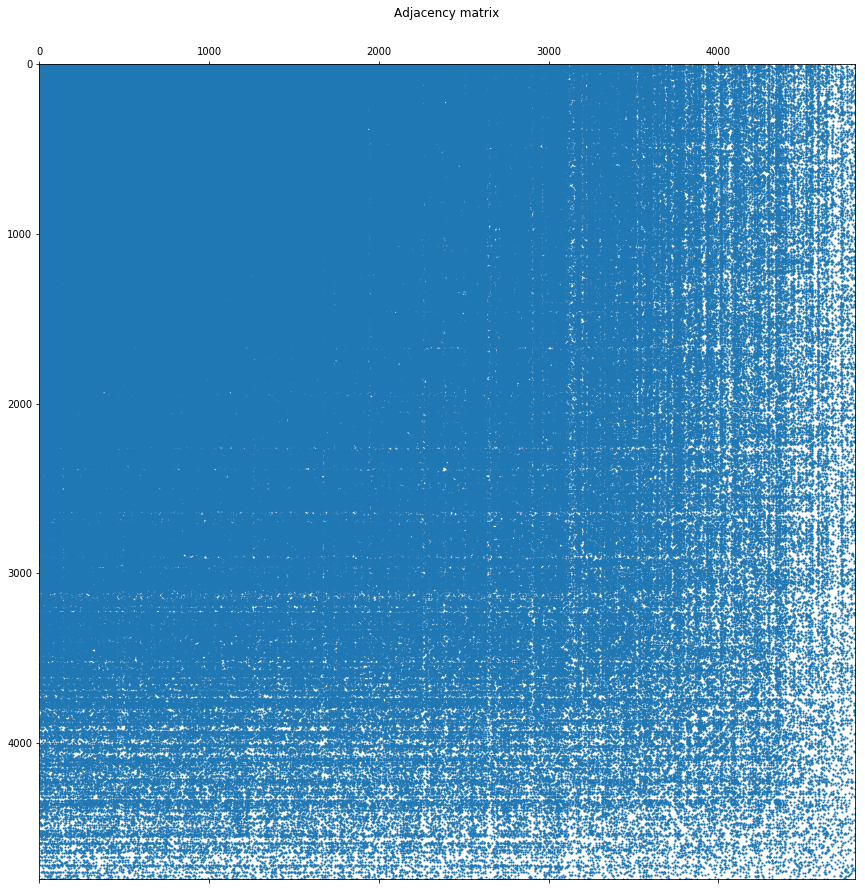

In [24]:
plt.figure(figsize=(15, 15))
plt.spy(adjacency, markersize=1)
plt.title('Adjacency matrix')
plt.show()

### Question 1

What is the maximum number of links $L_{max}$ in a network with $N$ nodes (where $N$ is the number of nodes in your network)? How many links $L$ are there in your collected network? Comment on the sparsity of your network.

In [17]:
# The maximum number of links is (N*(N-1))/2
L_max = int(n_nodes*(n_nodes-1)/2)

# Without considering twice the links (i.e. only considering half of the adjacency matrix):
L = int(np.count_nonzero(adjacency)/2)

# Sparsity of the network (%)
sparsity = ((len(adjacency)**2 - np.count_nonzero(adjacency))/len(adjacency)**2) * 100

print('Maximum number of links for our network: ' + str(L_max))
print('Number of links in our network: ' + str(L))
print('Sparsity of our network: ' + str(sparsity) + ' %')

Maximum number of links for our network: 11532003
Number of links in our network: 476873
Sparsity of our network: 95.8656469868037 %


**Answer:**

For a network with N nodes, the maximum number of links it can have is N*(N-1)/2. For our graph, where N = 4803, this means 11 532 003 links.

Our network however has L = 476873 links, which is 4.135 % of the maximum number of links. The number of links is approximately 10*n_nodes (~O(N), as most networks are)

We can hence conclude that our network is sparse.

### Question 2

Is your graph directed or undirected? If it is directed, convert it to an undirected graph by symmetrizing the adjacency matrix.

**Answer:**

Our network's nodes are movies and the edges between them are the number of actors and staff that movies have in common. Hence the network is inherently undirected.

However, we computed the whole adjacency matrix, not only the upper half, and we tested if the matrix was symmetrical. Its symmetry is confirmed by the result of the operation being 'True'. We therefore don't need to symmetrize the matrix. 

In [182]:
# Your code here.
# This checks if the adjacency matrix and it symmetric are the same
is_sym = np.allclose(adjacency, adjacency.T)
print("Symmetry of the adjacency matrix: " + str(is_sym))

Symmetry of the adjacency matrix: True


### Question 3

In the cell below save the features dataframe and the **symmetrized** adjacency matrix. You can use the Pandas ``to_csv`` to save the ``features`` and Numpy's ``save`` to save the ``adjacency``. We will reuse those in the following milestones.

In [22]:
# Your code here.
# Save the features
features.to_csv(DATA_PATH + 'features.csv')

# Save the adjacency matrix
np.save(DATA_PATH + 'adjacency.npy', adjacency)

In [23]:
# Additional code: load features and adjacency matrix
features = pd.read_csv(DATA_PATH + 'features.csv')
adjacency = np.load(DATA_PATH + 'adjacency.npy')

### Question 4

Are the edges of your graph weighted?

**Your answer here.**

### Question 5

What is the degree distibution of your network? 

In [ ]:
degree =  # Your code here. It should be a numpy array.

assert len(degree) == n_nodes

Execute the cell below to see the histogram of the degree distribution.

In [ ]:
weights = np.ones_like(degree) / float(n_nodes)
plt.hist(degree, weights=weights);

What is the average degree?

In [ ]:
# Your code here.

### Question 6

Comment on the degree distribution of your network.

**Your answer here.**

### Question 7

Write a function that takes as input the adjacency matrix of a graph and determines whether the graph is connected or not.

In [18]:
def connected_graph(adjacency):
    """Determines whether a graph is connected.
    A connected (undirected) graph is a graph where any two vertices can be joined by a path.
    
    Parameters
    ----------
    adjacency: numpy array
        The (weighted) adjacency matrix of a graph.
    
    Returns
    -------
    bool
        True if the graph is connected, False otherwise.
    """
    
    # Your code here.
    # Convert adjacency matrix into adjacency list
    adj_list = []
    for i in range(0, len(adjacency)):
        adj_list.append(list(np.nonzero(adjacency[i])[0]))
    
    start = 0
    queue = []
    visited = set()

    queue.append(start)
    visited.add(start)

    while queue:
        current = queue.pop(0)
        for node in adj_list[current]:
            if node not in visited:
                queue.append(node)
                visited.add(node)
    
    if len(visited) == len(adjacency):
        connected = True
    else:
        connected = False
    
    return connected

Is your graph connected? Run the ``connected_graph`` function to determine your answer.

In [19]:
# Your code here.
connectedness = connected_graph(adjacency)
print('Connectedness of the graph: ' + str(connectedness))

Connectedness of the graph: False


### Question 8

Write a function that extracts the connected components of a graph.

In [28]:
def find_components(adjacency):
    """Find the connected components of a graph.
    
    Parameters
    ----------
    adjacency: numpy array
        The (weighted) adjacency matrix of a graph.
    
    Returns
    -------
    list of numpy arrays
        A list of adjacency matrices, one per connected component.
    """
    
    # Your code here.
    adj_list = []
    for i in range(0, len(adjacency)):
        adj_list.append(list(np.nonzero(adjacency[i])[0]))
        
    nodes = np.zeros(len(adjacency))
    n = 0
    
    while (np.count_nonzero(nodes) != len(adjacency)):
        n = n+1
        start = np.where(nodes == 0)[0][0]
        queue = []
        visited = set()

        queue.append(start)
        visited.add(start)

        while queue:
            current = queue.pop(0)
            for node in adj_list[current]:
                if node not in visited:
                    queue.append(node)
                    visited.add(node)
        
        visited = list(visited)
        nodes[visited] = n
    
    print('The graph is composed of ' + str(n) + ' connected component(s)')
    components = []
    
    for i in range(1, n+1):
        adj = []
        for element in list(np.where(nodes==i)[0]):
            adj.append(adjacency[element])
        adj = np.array(adj)
        # Find all only-zero columns
        idx = np.argwhere(np.all(adj[..., :] == 0, axis=0))
        # Delete them
        adj = np.delete(adj, idx, axis=1)
        components.append(adj)
        
    return components

How many connected components is your network composed of? What is the size of the largest connected component? Run the ``find_components`` function to determine your answer. 

In [29]:
# Your code here.
connected_components = find_components(adjacency)
max_len = 0
for component in connected_components:
    if len(component) > max_len:
        max_len = len(component)

print("The size of the largest connected component is: " + str(max_len) + " nodes")
print("Total number of nodes: " + str(n_nodes))

The graph is composed of 91 connected component(s)
The size of the largest connected component is: 4713 nodes
Total number of nodes: 4803


In [32]:
connected_components

[array([[0., 1., 0., ..., 0., 0., 0.],
        [1., 0., 1., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([], shape=(1, 0), dtype=float64),
 array([], shape=(1, 0), dtype=float64),
 array([], shape=(1, 0), dtype=float64),
 array([], shape=(1, 0), dtype=float64),
 array([], shape=(1, 0), dtype=float64),
 array([], shape=(1, 0), dtype=float64),
 array([], shape=(1, 0), dtype=float64),
 array([], shape=(1, 0), dtype=float64),
 array([], shape=(1, 0), dtype=float64),
 array([], shape=(1, 0), dtype=float64),
 array([], shape=(1, 0), dtype=float64),
 array([], shape=(1, 0), dtype=float64),
 array([], shape=(1, 0), dtype=float64),
 array([], shape=(1, 0), dtype=float64),
 array([], shape=(1, 0), dtype=float64),
 array([], shape=(1, 0), dtype=float64),
 array([], shape=(1, 0), dtype=float64),
 array([], shape=(1, 0), dtype=float64),
 array([], sh

**Answer:**

We can see that our graph is not connected and is composed of 91 connected components. However, its biggest connected component is almost the size of the full graph and leaves only 90 other nodes that are not connected to it. Since there are 90 other components and 90 other nodes that need accounting for, this suggests that the 90 other nodes (movies) are disconnected from any other node. We have verifyed this by printing the list of adjacency matrices of each connected component. The first element is indeed a matrix, however the other 90 elements are empty arrays with shape (1,0). 
The 90 films not connected to the biggest connected element are indeed connected to no other node. 

### Question 9

Write a function that takes as input the adjacency matrix and a node (`source`) and returns the length of the shortest path between that node and all nodes in the graph using Dijkstra's algorithm. **For the purposes of this assignment we are interested in the hop distance between nodes, not in the sum of weights. **

Hint: You might want to mask the adjacency matrix in the function ``compute_shortest_path_lengths`` in order to make sure you obtain a binary adjacency matrix. 

In [1]:
def compute_shortest_path_lengths(adjacency, source):
    """Compute the shortest path length between a source node and all nodes.
    
    Parameters
    ----------
    adjacency: numpy array
        The (weighted) adjacency matrix of a graph.
    source: int
        The source node. A number between 0 and n_nodes-1.
    
    Returns
    -------
    list of ints
        The length of the shortest path from source to all nodes. Returned list should be of length n_nodes.
    """
    
    shortest_path_lengths= [None for x in range(len(adjacency))]
    #shortest_path_lengths= [float("inf") for x in range(len(adjacency))]
    
    adj_list = []
    for i in range(0, len(adjacency)):
        adj_list.append(list(np.nonzero(adjacency[i])[0]))
    
    queue = []
    visited = set()
    queue.append(source)
    visited.add(source)
    
    current_lenght = 1

    while queue:
        current = queue.pop(0)
        for node in adj_list[current]:
            if node not in visited:
                queue.append(node)
                visited.add(node)
                shortest_path_lengths[node] = current_lenght
        
        current_lenght += 1    
    
    return shortest_path_lengths

### Question 10

The diameter of the graph is the length of the longest shortest path between any pair of nodes. Use the above developed function to compute the diameter of the graph (or the diameter of the largest connected component of the graph if the graph is not connected). If your graph (or largest connected component) is very large, computing the diameter will take very long. In that case downsample your graph so that it has 1.000 nodes. There are many ways to reduce the size of a graph. For the purposes of this milestone you can chose to randomly select 1.000 nodes. 

In [3]:
import random
SUBSET_LENGHT = 1000

nodes = random.sample(range(0, len(adjacency)-1), SUBSET_LENGHT)
adjacency_subset = adjacency[np.ix_(nodes,nodes)]

dist_max = [0]*SUBSET_LENGHT

for node in range(0, SUBSET_LENGHT-1):
    dist = compute_shortest_path_lengths(adjacency_subset, node)
    dist = [0 if x==None else x for x in dist] 
    dist_max[node] = max(dist)

diameter = max(dist)
print("Diameter of the current random subset is", diameter,"and rarely goes over 964 for other random subsets" )

NameError: name 'adjacency' is not defined

### Question 11

Write a function that takes as input the adjacency matrix, a path length, and two nodes (`source` and `target`), and returns the number of paths of the given length between them.

In [ ]:
def compute_paths(adjacency, source, target, length):
    """Compute the number of paths of a given length between a source and target node.
    
    Parameters
    ----------
    adjacency: numpy array
        The (weighted) adjacency matrix of a graph.
    source: int
        The source node. A number between 0 and n_nodes-1.
    target: int
        The target node. A number between 0 and n_nodes-1.
    length: int
        The path length to be considered.
    
    Returns
    -------
    int
        The number of paths.
    """
    
    # Your code here.
    
    return n_paths

Test your function on 5 pairs of nodes, with different lengths.

In [ ]:
print(compute_paths(adjacency, 0, 10, 1))
print(compute_paths(adjacency, 0, 10, 2))
print(compute_paths(adjacency, 0, 10, 3))
print(compute_paths(adjacency, 23, 67, 2))
print(compute_paths(adjacency, 15, 93, 4))

### Question 12

How many paths of length 3 are there in your graph? Hint: calling the `compute_paths` function on every pair of node is not an efficient way to do it.

In [ ]:
# Your code here.

### Question 13

Write a function that takes as input the adjacency matrix of your graph (or of the largest connected component of your graph) and a node and returns the clustering coefficient of that node. 

In [ ]:
def compute_clustering_coefficient(adjacency, node):
    """Compute the clustering coefficient of a node.
    
    Parameters
    ----------
    adjacency: numpy array
        The (weighted) adjacency matrix of a graph.
    node: int
        The node whose clustering coefficient will be computed. A number between 0 and n_nodes-1.
    
    Returns
    -------
    float
        The clustering coefficient of the node. A number between 0 and 1.
    """
    
    # Your code here.
    
    return clustering_coefficient

### Question 14

What is the average clustering coefficient of your graph (or of the largest connected component of your graph if your graph is disconnected)? Use the function ``compute_clustering_coefficient`` to determine your answer.

In [ ]:
# Your code here.